# Functions, libraries, and other python codes used

- Beautifulsoup, for scraping various websites
- wget, to download files from website
- Pandas, various pandas functions
- Folium, to display maps, etc.
- For loops
- Matplotlib, to display charts and other figures

### Down below, I will display all the libraries imported
-------
- import requests
- from bs4 import BeautifulSoup
- import numpy as np
- import pandas as pd
- import ssl
- import csv
- import types
- import pandas as pd
- from botocore.client import Config
- import ibm_boto3
- import matplotlib.pyplot as plt
- %matplotlib inline
- from urllib.request import urlopen
- import json
- import os
- import matplotlib as mpl
- from sklearn.cluster import KMeans
- import json
- from pandas.io.json import json_normalize
- import matplotlib.cm as cm
- import matplotlib.colors as colors
- from geopy.geocoders import Nominatim

## This Notebook Will Be Mainly Used for The Capstone Project for Coursera!!

# Capstone Project Course!
---------------


## Methodology
### A survey was created spicifically for the collection of data for the college department. Other data sources were pulled and scraped for data that could re-inforce the research. Bar charts and choroplegh maps were constructed to visualize findings and ilustrate other results.

## Introduction
### Hello,<br><br> With this project, I wanted to find out many things regarding international students at a particular college.<br> At a particular department, they deal with many students on a regular basis. <br> Most students come for their services and I wanted to use this as a way to gather information about the students.<br> So, I created a survey to gather this information to not only gather data in general, but to see how the department is doing. <br> This not only helps me with my research, but could also help the department understand their strenghts and weaknesses, <br> and see where they can improve. After I have gathered my information, I will see where the data takes me. <br> <br> Let's get started!!
-----------

### Install neccessary library for data analysis

In [341]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from urllib.request import urlopen
import json
import os
import matplotlib as mpl


In [342]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



### Import survey data

In [343]:
body = client_d2176d3c83b24807a631d95ccc61e570.get_object(Bucket='courseracapstoneproject-donotdelete-pr-ogoitivhivs0p3',
                                                          Key='OSMM Walk In Questionaire_March 6, 2020_12.25.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data2 = data.copy()

# Show first 5 rows of survey data

### Clean survey data to prepare for analysis

In [344]:
data2.drop(['Status','IPAddress', 'RecipientLastName', 'RecipientFirstName', 'LocationLatitude', 'LocationLongitude',
            'Q32', 'Q15_NPS_GROUP', 'RecipientEmail', 'ExternalReference'], axis=1)
data3 = data2.drop(['Status','IPAddress', 'RecipientLastName', 'RecipientFirstName', 'LocationLatitude', 'LocationLongitude',
            'Q32', 'Q15_NPS_GROUP', 'RecipientEmail', 'ExternalReference'], axis=1)
data4 = data3[data3['Finished']== 'True']


In [345]:
data4.head() # Survey data Ready for analysis!!

StartDate              EndDate Progress Duration (in seconds)  \
2  2020-02-14 22:30:04  2020-02-14 22:32:09      100                   125   
3  2020-02-17 09:54:55  2020-02-17 09:57:04      100                   128   
4  2020-02-18 12:18:30  2020-02-18 12:20:59      100                   148   
5  2020-02-18 12:49:22  2020-02-18 12:51:31      100                   129   
6  2020-02-19 09:57:41  2020-02-19 10:01:29      100                   228   

  Finished         RecordedDate         ResponseId DistributionChannel  \
2     True  2020-02-14 22:32:11  R_07Gz16OIoTrYj0R           anonymous   
3     True  2020-02-17 09:57:04  R_1OhHEbw1XYSBkFX           anonymous   
4     True  2020-02-18 12:20:59  R_3KBhe5JaXK4695A           anonymous   
5     True  2020-02-18 12:51:32  R_1AZRw0bOIoHVgGt           anonymous   
6     True  2020-02-19 10:01:30  R_3oXiM2nIBtKERPn           anonymous   

  UserLanguage               Q2  ...          Q14 Q15  \
2           EN  Moderately easy  ...  Very Likely  10   
3           EN  Moderately easy  ...       Likely   9   
4           EN  Moderately easy  ...  Very Likely  10   
5           EN    Extremely eas  ...  Very Likely  10   
6           EN  Moderately easy  ...  Very Likely   9   

                                Q17                               Q28  \
2                   Tax Appointment                     Tabling Event   
3                   Tax Appointment                  Student Referral   
4  Tax Appointment,Tax Help Walk-In  Student Referral,Handshake,Email   
5                   Tax Appointment                  Student Referral   
6                  Tax Help Walk-In                             Other   

               Q25             Q27          Q21            Q22            Q23  \
2    Slightly easy    Probably yes        Other       Master's       Master's   
3    Slightly easy    Probably yes     Business       Master's  Undergraduate   
4  Moderately easy  Definitely yes  Engineering  Undergraduate  Undergraduate   
5   Extremely easy  Definitely not  Engineering  Undergraduate  Undergraduate   
6  Moderately easy  Definitely yes     Business  Undergraduate            NaN   

                       Q24  
2  Domestic - U.S Resident  
3  International - F1 Visa  
4  International - F1 Visa  
5  International - F1 Visa  
6  International - F1 Visa  

[5 rows x 26 columns]

### Now that I have prepared the data for analysis, we can start analyzing the survey results! <br> Most of the data will be in percentage of population, with 1.0 being 100% and .01 being 1%. <br>Let's get going with the analysis!

<br> <br>

### Most students, about 90%, find it easy to prepare to visit the department. <br> With prepare I mean, having the neccessary documents for the department to help them.<br> See below results!

In [346]:
resources_obtainability_dificulty = data4['Q2'].value_counts(normalize=True)
print(resources_obtainability_dificulty) #Display below how easy it is for students to obtain
#neccessary resources for us to start helping them, in percentage.

Extremely eas           0.642857
Moderately easy         0.250000
Moderately difficult    0.071429
Slightly easy           0.035714
Name: Q2, dtype: float64


### Most students find the department's services useful. So, they are offering what the students need. <br>See below results!

In [347]:
how_useful_is_our_services = data4['Q3'].value_counts(normalize=True)
print(how_useful_is_our_services) #Display below how useful our services are, in percentage

Extremely useful    0.896552
Very useful         0.103448
Name: Q3, dtype: float64


### As we can see, some students are confused if they can differentiate our services from what other departments offer. <br> In summary, about 10% of the students are confused about what services belong to that particular department.<br> Maybe they need to advertise more, or create more student awareness about their department, and also, differentiate more? <br>Results are shown below!

In [348]:
used_our_services_before = data4['Q27'].value_counts(normalize=True)
print(used_our_services_before) 
#Display below if the students that walked in used our services before.

Definitely yes    0.655172
Definitely not    0.241379
Probably yes      0.068966
Probably not      0.034483
Name: Q27, dtype: float64


### Display below the department's most successful way of advertising , in percentage of survey population!

Email                                                 0.310345
Student Referral                                      0.172414
Other                                                 0.103448
Used Our Services Before                              0.068966
Tabling Event                                         0.068966
Used Our Services Before,Email                        0.068966
Student Referral,WSU TV (ADS),Handshake               0.034483
Student Referral,WSU TV (ADS),Flyers Around Campus    0.034483
Flyers Around Campus                                  0.034483
Handshake,Email,Other                                 0.034483
Student Referral,Flyers Around Campus,Email           0.034483
Student Referral,Handshake,Email                      0.034483
Name: Q28, dtype: float64


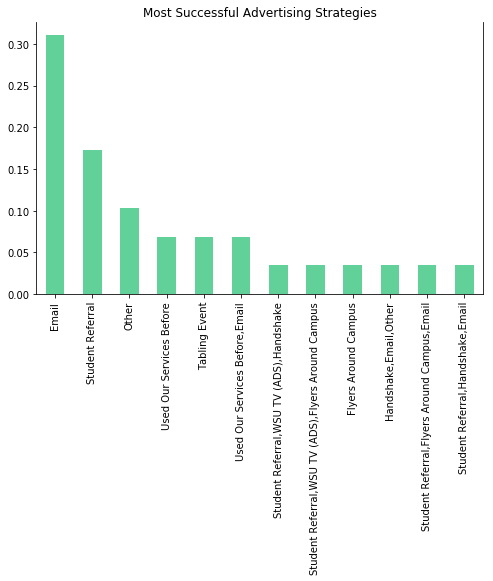

In [349]:
where_did_you_hear_of_us = data['Q28'].drop([0,1]).value_counts(normalize=True)
print(where_did_you_hear_of_us)
where_did_you_hear_of_us.plot(kind="bar", figsize=(8,5), color="#61d199", title='Most Successful Advertising Strategies') 
#Display below most successful way of advertising ourselves, in percentage

### Clearly, using email and student referral is their best advertising strategy. <br> But, they should dig into what "Other" strategy is working that we don't have in our list.

### Display below the quality level of their services in percentage of survey population

In [350]:
service_quality_perception = data4['Q7'].value_counts(normalize=True)
print(service_quality_perception) 

Extremely good          0.896552
Moderately good         0.068966
Neither good nor bad    0.034483
Name: Q7, dtype: float64


### It looks like more than 95% of students think that their service quality is moderately good and above!

### Display below how knowledgeable students perceive the department staff to be when they helping them.<br> This is in percentage of the survey population! Below are the results!

In [352]:
knowledgeable_score = data4['Q9'].value_counts(normalize=True)
print(knowledgeable_score) 

Extremely knowledgable    0.724138
Very knowledgable         0.275862
Name: Q9, dtype: float64


### Display below if students find the time it takes to help them reasonable. Again, in percentage of population!

In [353]:
how_reasonable_time_to_finish_is = data['Q12'].drop([0,1]).value_counts(normalize=True)
print(how_reasonable_time_to_finish_is) 

Extremely reasonable     0.714286
Moderately reasonable    0.214286
Slightly reasonable      0.035714
Slightly unreasonable    0.035714
Name: Q12, dtype: float64


### As we can see, most students find the time reasonable. <br> My reason for asking this on the survey is due to the average time taking to help students is about 1 hour!

### Display below the percentage of students are or are not satisfied with their services.

In [354]:
Satisfaction_with_service = data4['Q13'].value_counts(normalize=True)
print(Satisfaction_with_service) 

Very Satisfied           0.827586
Satisfied                0.137931
Somewhat Dissatisfied    0.034483
Name: Q13, dtype: float64


### Good! So, most, about 96% of students are satisfied. Maybe they could look into why the other 4% aren't.

### Display below the score out of 10 of how likely a student would recommend them to a peer

In [355]:
mean_peer_recommendation_score = data4['Q15'].astype(int).mean()
print(mean_peer_recommendation_score) 

9.724137931034482


### This looks accurate since 96% of students are satisfied, I would have imagined about 96% to 97% would recommend them to peers!

### Display below the reasons for walking into the department, in percentage of survey population.

In [383]:
reason_for_walk_in_percentage = data4['Q17'].value_counts(normalize=True)
print(reason_for_walk_in_percentage[[0,1,2,3,5]]) 

Tax Appointment                                                0.344828
Tax Appointment,Tax Help Walk-In                               0.310345
Tax Help Walk-In                                               0.241379
Other                                                          0.034483
Tax Appointment,Tax Help Walk-In,General Assistance Walk-In    0.034483
Name: Q17, dtype: float64


### Although many students can come to the department for different type of finacial help, most walk in for tax help.

## Discussion
### Now that we know the reasons for walking in, and how students rate the department services and the overall satisfaction, let's find out a little bit about their background. This is part of why I wanted to do the research!

### Display below the academic background of students that are walking into our office, in percentage of survey population.

Engineering                  0.689655
Business                     0.172414
Other                        0.034483
Health Professions           0.034483
Applied Studies              0.034483
Liberal Arts and Sciences    0.034483
Name: Q21, dtype: float64


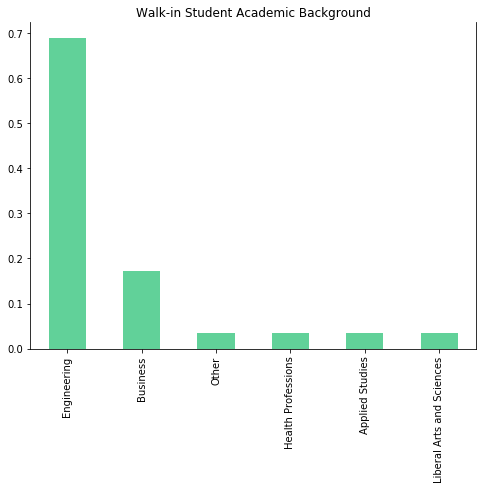

In [357]:
student_degree_background = data4['Q21'].value_counts(normalize=True)
print(student_degree_background)
student_degree_background.plot(kind="bar", figsize=(8,6), color="#61d199", title= 'Walk-in Student Academic Background') 

### Display below what degree that walk-in students hold at the time of service, in percentage of survey population.

Undergraduate    0.500000
Master's         0.464286
Other            0.035714
Name: Q23, dtype: float64


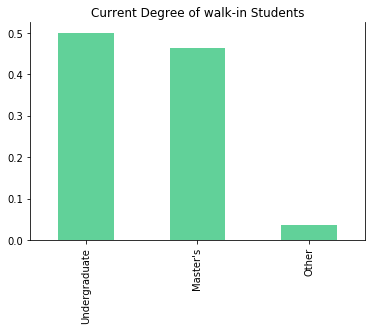

In [358]:
student_current_degree = data['Q23'].drop([0,1]).value_counts(normalize=True)
print(student_current_degree)
student_current_degree.plot(kind="bar", figsize=(6,4), color="#61d199", title= 'Current Degree of walk-in Students')


### Display below status type of students that walk in for the services, in percentage of survey population.

International - F1 Visa           0.896552
Domestic - Kansas U.S Resident    0.068966
Domestic - U.S Resident           0.034483
Name: Q24, dtype: float64


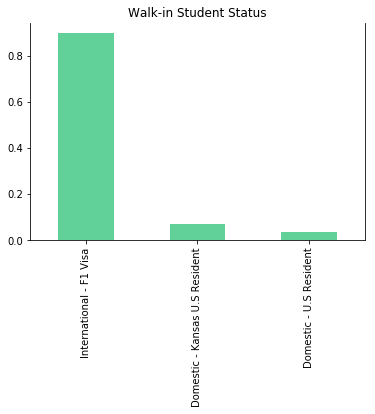

In [359]:
student_type = data['Q24'].drop([0,1]).value_counts(normalize=True)
print(student_type)

student_type.plot(kind="bar", figsize=(6,4), color="#61d199", title= 'Walk-in Student Status')


## Discussion
### Ok, so most of the students are international students with a background in engineering. About 50% are undergraduate, and around 46% are graduate. <br> So, it means that that most undergraduate students need tax help, but even though 46% of graduate students still walk in for service, it is decreasing. Also, I would need to find out what this "other" 4%'s background type is. I believe it could be something regarding maturity level, but then again, I would need to pull in age data for that, which I forgot to add into the survey.<br><br> Also, now that I have these results, I want to dive deeper into where international students' go the most. Now this time, I don't want to do another college department from a particular college, but I want more of a broader audience. I would want to find out what the student's top choice in college or university is and why. <br><br> So, let's get started!!

### Let's pull in data into a dataframe from a statistics website containing top leading institutions that are hosting international students in th USA.

In [360]:
def __iter__(self): return 0

body = client_d2176d3c83b24807a631d95ccc61e570.get_object(Bucket='courseracapstoneproject-donotdelete-pr-ogoitivhivs0p3',
                                                          Key='International-Students-Leading-Host-Institutions.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_international_students = pd.read_excel(body, sheet_name = '1', skiprows=3)
df_international_students.head()
df_international_students2 = df_international_students.copy()

### Now that we know the top institutions that host international students, let's group them by state. I have a theory that the states might be a clue as to why they go to a particular college.

In [361]:
df_international_students.dtypes

Rank           float64
Institution     object
City            object
State           object
States          object
2017/18          int64
2018/19          int64
% Change       float64
Latitude       float64
Longitude      float64
dtype: object

In [362]:
df2 = df_international_students.groupby("States").sum()
df2.drop(["% Change", "Latitude", "Longitude", "Rank"], axis=1, inplace=True)
df2.rename(columns={"2017/18": "International Students 2018", "2018/19": "International Students 2019"}, inplace=True)
df2.head()

International Students 2018  International Students 2019
States                                                                 
Arizona                              13459                        13324
California                           62524                        65109
Illinois                             13445                        13497
Indiana                              11044                        10943
Massachusetts                        24647                        26673

In [363]:
df3 = df2.reset_index()

In [364]:
df3.head() # Display first 5 rows of df3

States  International Students 2018  International Students 2019
0        Arizona                        13459                        13324
1     California                        62524                        65109
2       Illinois                        13445                        13497
3        Indiana                        11044                        10943
4  Massachusetts                        24647                        26673

### Now that we created a dataframe grouped by state and merged the data, we can start displaying it for a more displayable result.<br> Let's get some json files containing state coordinates to display the states where these top institutions reside!

In [365]:
!wget --quiet https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json
# Get json file on the website hosting it

In [366]:
import os
url = 'https://github.com/bradtraversy/python_folium_example/blob/master/data/us-states.json'
states = os.path.join('Downloads', 'gz_2010_us_040_00_500k.json')

In [367]:
US_geo = 'gz_2010_us_040_00_500k.json'
US_states = folium.Map(location=[37.0902, -95.7129], zoom_start=4) # ready usa folium to zoom over US when activated

In [368]:
# Configure map
US_states.choropleth(
    geo_data= US_geo,
    data=df3,
    columns=['States', 'International Students 2019'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='International Students by State')
folium.LayerControl().add_to(US_state)
# display map
US_states

## Discussion
### Above you can see a map of the USA. The colored states are the ones that host the top institutions that hold the most international students in the USA. The deeper and darker red the colors, the more students these institutions, or states that have these institutions, host. The other states that are just bright Yellow are not in the data. This is because I wanted to see only the top institutions and not all the institutions in the USA. Institutions being, colleges or universities. <br><br> As we can see, most of these states are border states. Also, these are not any border states. Border or gateway states are states that have either a direct international flight option or that house a lot of international citizens. They are the most popular states for business and that hold very large airports compared to other states.

### Now, I want to see if the international student population is increasing or not at these states. Let's create a bar chart and see.

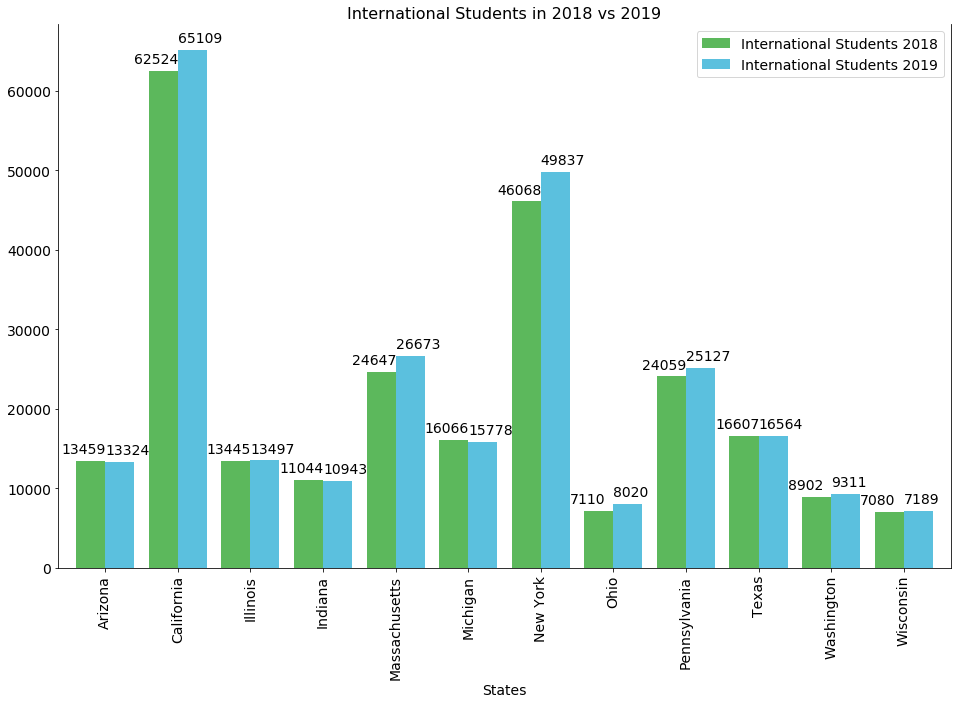

In [388]:
df2.plot(kind='bar',
       figsize=(16, 10),
       width=0.8,
       color=('#5cb85c', '#5bc0de', '#d9534f'))


# Create annotation texts and location based on dataframe values
txtLocs = []
annotexts = []
for i in range(0, 12):
    txtLocs.append((i, df2.iloc[i, 1]+ 1000))
    annotexts.append(str(df2.iloc[i, 1]))
    
for i in range(0, 12):
    txtLocs.append((i-.6, df2.iloc[i, 0]+ 1000))
    annotexts.append(str(df2.iloc[i, 0]))
# Annotation
for txt, loc in zip(annotexts, txtLocs):
    plt.annotate(txt, loc)


# Configure borders
mpl.rcParams["axes.spines.right"] = True
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.left"] = True

frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(True)
#fontsizes:
mpl.rcParams.update({'font.size': 14})
plt.title('International Students in 2018 vs 2019', fontsize=16)



plt.show()


## Discussion
### From what we can see in the graph, Most of these states are increasing in how many international students they hold. This also reinforces the theory that international students pick states like these because of either how pupolar they are for other international students, how easy it can be to visit other states or visit home due to an international airport being there, or how open these states are to hosting international students.

### let's display the busiest airports on the map for a clearer view of my theory. First we will scrape a wifkipedia page for the data that lists the busiest airports in the USA. So, Lets get started!

In [370]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import ssl
import csv
from urllib.request import urlopen # Import required libraries for scraping

### Let's start scraping the wiki page!!

In [371]:
URL = 'https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States'
page = requests.get(URL).text
soup = BeautifulSoup(page, 'lxml') # Configure beautifulsoup and attach url to function

In [372]:
ctx = ssl.create_default_context() 
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [373]:
data_table = soup.find('table',{'class':'wikitable sortable'})
data_rows = data_table.find_all('tr') # Start website scraping for information function

In [374]:
table3 = [] # Create table to house data from scraping
for row in data_rows:
    table3.append([t.text.strip() for t in row.find_all('td')])

In [375]:
header = ["Ranks", "Airport", "IATA Code", "Major City Served", "State", "2019","2018","2017",
          "2016", "2015", "2014","2013", "2012", "2011", "2010", "2009"] # Create header for scraped data in dataframe!

In [376]:
df = pd.DataFrame(table3, columns= header) #Create dataframe and add headers that were created.

In [377]:
df.drop([0], inplace=True)# Display first 5 rows of dataframe housing the data scraped from the wiki page.

In [378]:
df10 = df.head(10) #top 10 airports display
df10

Ranks                                           Airport IATA Code  \
1      1  Hartsfield–Jackson Atlanta International Airport       ATL   
2      2                 Los Angeles International Airport       LAX   
3      3                      O'Hare International Airport       ORD   
4      4           Dallas/Fort Worth International Airport       DFW   
5      5                      Denver International Airport       DEN   
6      6             John F. Kennedy International Airport       JFK   
7      7               San Francisco International Airport       SFO   
8      8              Seattle–Tacoma International Airport       SEA   
9      9                    McCarran International Airport       LAS   
10    10                     Orlando International Airport       MCO   

   Major City Served State 2019        2018        2017        2016  \
1            Atlanta    GA       51,866,464  50,251,964  50,501,858   
2        Los Angeles    CA       42,626,783  41,232,432  39,636,042   
3            Chicago    IL       39,874,879  38,593,028  37,589,899   
4             Dallas    TX       32,800,721  31,816,933  31,283,579   
5             Denver    CO       31,363,573  29,809,097  28,267,394   
6           New York    NY       30,541,459  29,533,154  29,239,151   
7      San Francisco    CA       27,794,154  26,900,048  25,707,101   
8            Seattle    WA       24,894,338  22,639,124  21,887,110   
9          Las Vegas    NV       23,655,285  23,364,393  22,833,267   
10           Orlando    FL       23,184,634  21,565,448  20,283,541   

          2015        2014        2013        2012        2011        2010  \
1   49,340,732  46,604,273  45,308,407  45,798,809  44,414,121  43,130,585   
2   36,351,226  34,314,197  32,425,892  31,326,268  30,528,737  28,857,755   
3   36,305,668  33,686,811  32,317,835  32,171,743  31,892,301  32,171,831   
4   31,589,832  30,766,940  29,038,128  28,022,877  27,518,358  27,100,656   
5   26,280,043  26,000,591  25,496,885  25,799,832  25,667,499  25,241,962   
6   27,782,369  26,244,928  25,036,358  24,520,943  23,664,830  22,934,047   
7   24,190,549  22,756,008  21,704,626  21,284,224  20,038,679  19,359,003   
8   21,231,781  18,781,489  17,450,425  16,625,787  16,425,732  15,406,243   
9   21,824,231  20,551,016  19,946,179  19,941,173  19,854,759  18,996,738   
10  18,759,938  17,278,608  16,884,524  17,159,425  17,250,415  17,017,491   

          2009  
1   42,280,868  
2   27,439,897  
3   31,135,732  
4   26,663,984  
5   24,013,669  
6   22,710,272  
7   18,467,908  
8   15,273,092  
9   19,445,952  
10  16,371,016

## Discussion
### We can see by the 2018 and 2017 total amounts of people visiting the top airports that the airport are getting busier as well, but that is not ONLY due to international student activity, but it could mean that since they are getting busier, that they are more likely to be a top choice for international students that want to study abroad in the USA. <br><br> Let's get the top 10 states by airport and see if they correlate with the top states that host international students.

In [379]:
df_main = df_international_students2.merge(df10, on='State', how= 'left')
df_main.drop(columns=['2019','2014','2013','2012','2011','2010','2009', '2017/18', '2018/19',
                     'Rank', 'Institution', 'City', '% Change'], inplace=True) 
# Take out unneccessary columns and other information

In [380]:
df_main_rank = df_main.set_index('Ranks').sort_index()
df_main_rank2 = df_main_rank.drop_duplicates(subset= 'States').head(5)
df_main_rank2

State      States   Latitude   Longitude  \
Ranks                                            
2        CA  California  36.116203 -119.681564   
3        IL    Illinois  40.349457  -88.986137   
4        TX       Texas  31.054487  -97.563461   
6        NY    New York  42.165726  -74.948051   
8        WA  Washington  47.400902 -121.490494   

                                       Airport IATA Code Major City Served  \
Ranks                                                                        
2            Los Angeles International Airport       LAX       Los Angeles   
3                 O'Hare International Airport       ORD           Chicago   
4      Dallas/Fort Worth International Airport       DFW            Dallas   
6        John F. Kennedy International Airport       JFK          New York   
8         Seattle–Tacoma International Airport       SEA           Seattle   

             2018        2017        2016        2015  
Ranks                                                  
2      42,626,783  41,232,432  39,636,042  36,351,226  
3      39,874,879  38,593,028  37,589,899  36,305,668  
4      32,800,721  31,816,933  31,283,579  31,589,832  
6      30,541,459  29,533,154  29,239,151  27,782,369  
8      24,894,338  22,639,124  21,887,110  21,231,781

## Discussion
### So, unfortunately, we are missing 5 out of the top 10 states that host the busiest airports in the USA, but this tells us that the theory so far is 50% accurate. So, I might be right that international students are more interested in states that have the busiest airports, or I might be wrong. There is a 50/50 percent on that, but, there is still the fact that most the top 25 universities that host most international students are border states which you can verify down below on the map I made previously. I will also add the table of data that I have on the states with busiest airport to ilustrate that this theory can somewhat correlate with the findings. Again, it is up for debate and could use more research, but that is all I wanted to find out for now. 

In [381]:
df_main_rank2 # Display table 

State      States   Latitude   Longitude  \
Ranks                                            
2        CA  California  36.116203 -119.681564   
3        IL    Illinois  40.349457  -88.986137   
4        TX       Texas  31.054487  -97.563461   
6        NY    New York  42.165726  -74.948051   
8        WA  Washington  47.400902 -121.490494   

                                       Airport IATA Code Major City Served  \
Ranks                                                                        
2            Los Angeles International Airport       LAX       Los Angeles   
3                 O'Hare International Airport       ORD           Chicago   
4      Dallas/Fort Worth International Airport       DFW            Dallas   
6        John F. Kennedy International Airport       JFK          New York   
8         Seattle–Tacoma International Airport       SEA           Seattle   

             2018        2017        2016        2015  
Ranks                                                  
2      42,626,783  41,232,432  39,636,042  36,351,226  
3      39,874,879  38,593,028  37,589,899  36,305,668  
4      32,800,721  31,816,933  31,283,579  31,589,832  
6      30,541,459  29,533,154  29,239,151  27,782,369  
8      24,894,338  22,639,124  21,887,110  21,231,781

In [382]:
# Ilustrate map
US_states

# Conclusion & Results, 
### Airports are getting busier, 5 of the top 8 busiest airports are in states that host the most international students in the USA. <br>We have seen that the total visitors to these airports are increasing, and the same goes for the total international students that these states host at certain institutions.<br> Although the college department's survey does not directly correlate with why students are staying more at border states, <br>we can see that it is very important that the college department understand why the students are going there, and to understand their audience. <br> For example, we know many students that visit that department are international students, most of them are engineering majors. <br>If they could understand why engineering students are coming more often, they could adapt this for other majors as well. If international students are seen more often, <br>maybe that department could work with enrollment to form a strategy to increase enrollment because we know from the survey results that peer referral is the nr.2 best advertisment for that department. Many things could be done with these results to strategise and for planning. <br><br> Thank you for taking a look at this project and I hope you found this somewhat interesting!

## End of project

--- JP
--------------